In [19]:
IMAGE = "assets/examples/centurion.png"
img = Image.open(IMAGE)

/home/me/Repos/spritegrid/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to facebook/sam-vit-huge and revision 87aecf0 (https://huggingface.co/facebook/sam-vit-huge).
Using a pipeline without specifying a model name and revision in production is not recommended.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


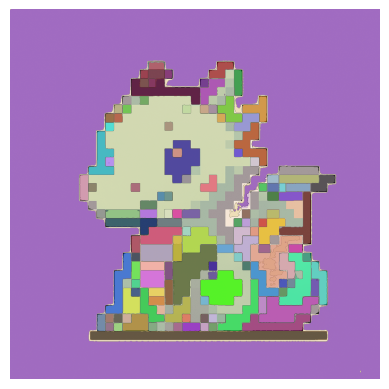

In [ ]:
from transformers import pipeline

generator = pipeline("mask-generation", device=0, points_per_batch=256)
# IMAGE = "assets/examples/dragon.png"

outputs = generator(IMAGE, prompt="background")


import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

bg_mask = next(m for m in outputs["masks"] if m[-1, -1])

# img = img.convert("RGBA")

# img.putalpha(Image.fromarray((~m).astype("uint8") * 255, mode="L"))


def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)


plt.imshow(np.array(Image.open(IMAGE)))
ax = plt.gca()
for mask in outputs["masks"]:
    show_mask(mask, ax=ax, random_color=True)
plt.axis("off")
plt.show()

In [20]:

# Prepare the dataset as [r, g, b, x, y] for clustering
from sklearn.cluster import DBSCAN
im_arr = np.array(img)
dataset = np.concatenate([im_arr.reshape(-1, 3), x.reshape(-1, 1), y.reshape(-1, 1)], axis=1)
dataset



array([[ 239,  216,  176,    0,    0],
       [ 238,  216,  179,    1,    0],
       [ 239,  217,  178,    2,    0],
       ...,
       [ 239,  216,  177, 1021, 1023],
       [ 239,  217,  177, 1022, 1023],
       [ 240,  215,  179, 1023, 1023]], shape=(1048576, 5))

In [21]:

# Fit the DBSCAN model
dbscan = DBSCAN(eps=5, min_samples=50)
labels = dbscan.fit_predict(dataset)


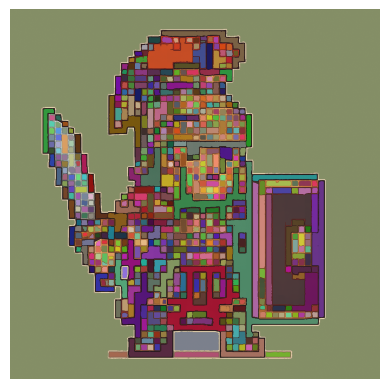

In [22]:

# Reshape labels to match the image dimensions
clustered_mask = labels.reshape(h, w)

# Display the clusters as masks
plt.imshow(np.array(img))
ax = plt.gca()
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == -1:  # Skip noise
        continue
    mask = clustered_mask == label
    show_mask(mask, ax=ax, random_color=True)
plt.axis("off")
plt.show()

In [23]:
bg_mask = (clustered_mask != 0).astype(np.uint8) * 255

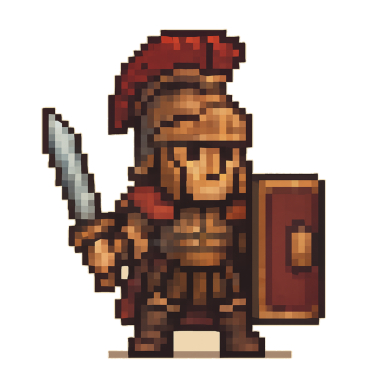

In [24]:
# Apply alpha channel to the image
img_with_alpha = img.convert("RGBA")
alpha_channel = Image.fromarray(bg_mask, mode="L")
img_with_alpha.putalpha(alpha_channel)

# Display the image with alpha
plt.imshow(img_with_alpha)
plt.axis("off")
plt.show()

{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(15),
 np.int64(16),
 np.int64(17),
 np.int64(18),
 np.int64(19),
 np.int64(20),
 np.int64(21),
 np.int64(22),
 np.int64(23),
 np.int64(24),
 np.int64(25),
 np.int64(26),
 np.int64(27),
 np.int64(28),
 np.int64(29),
 np.int64(30),
 np.int64(31),
 np.int64(32),
 np.int64(33),
 np.int64(34),
 np.int64(35),
 np.int64(36),
 np.int64(37),
 np.int64(38),
 np.int64(39),
 np.int64(40),
 np.int64(41),
 np.int64(42),
 np.int64(43),
 np.int64(44),
 np.int64(45),
 np.int64(46),
 np.int64(47),
 np.int64(48),
 np.int64(49),
 np.int64(50),
 np.int64(51),
 np.int64(52),
 np.int64(53),
 np.int64(54),
 np.int64(55),
 np.int64(56),
 np.int64(57),
 np.int64(58),
 np.int64(59),
 np.int64(60),
 np.int64(61),
 np.int64(62),
 np.int64(63),
 np.int64(64),
 np.int64(65),
 np.i

In [17]:
labels

array([0, 0, 0, ..., 0, 0, 0], shape=(1048576,))

In [3]:
dataset

array([[   0,    0,    0],
       [   1,    0,    0],
       [   2,    0,    1],
       ...,
       [1021, 1023,    1],
       [1022, 1023,    1],
       [1023, 1023,    1]], shape=(1048576, 3))